In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(boston.DESCR)

C:\Users\usuario\anaconda3\envs\mient\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Regresión lineal Simple
Modelo: $y_i=\beta_0 + \beta_1x_i+\varepsilon_i$

Función de coste: $\hat{\beta}_1=$ <font size="4">$\frac{\sum_{i=1}^{n} (x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n} (x_{i}-\overline{x})^2}$</font>$,$ &nbsp;&nbsp;&nbsp;$\hat{\beta}_0=\overline{y}-\hat{\beta}_1\overline{x}$

In [3]:
def summation(serie):
    acum = 0
    for number in serie:
        acum = acum + number
    return acum

def mean(x_serie):
    return summation(x_serie)/len(x_serie)

def variance(serie, mean):
    diff = []
    for number in serie:
        diff.append((number - mean)**2)
    return summation(diff)

def covariance(serie_1, serie_2, mean_1, mean_2):
    result = []
    for pos in range(len(serie_1)):
        result.append((serie_1[pos] - mean_1) * (serie_2[pos] - mean_2))
    return summation(result)

# traer todas las filas de la columna tasa de delincuencia per capita por localidad
x = boston.data[:,0]
# precio de la vivienda
y = boston.target

# los procesos en este bloque estan basados en la esperanza (E())
x_mean = mean(x)
y_mean = mean(y)
b_variance = variance(x, x_mean)
b_1 = covariance(x, y, x_mean, y_mean) / b_variance
b_0 = y_mean - b_1 * x_mean

# corresponde al punto de corte en 'y' o el valor de 'y' cuando x=0 (o la tasa de delincuencia es 0)
print(b_0)
# la relación de crecimiento de la variable dependiente respecto a la independiente (es decir, entre menos criminalidad 
# haya, el precio de la vivienda crece en b_1 unidades)
print(b_1)
# predicción de un valor; en este caso el valor de la vivienda cuando la tasa de delincuencia es de x=0.93%
print(b_1 * 9.3e-01 + b_0)

24.0331061741239
-0.4151902779150907
23.646979215662867


# Calidad del ajuste de las rectas de regresión

## Coeficiente de correlación de Pearson

Coeficiente de correlación de Pearson: $r_{xy}=\hat{\beta}_1$ <font size="4">$\frac{\sigma_x}{\sigma_y}$</font>

In [8]:
r = b_1 * (b_variance**0.5 / variance(y, y_mean)**0.5)

# si r es igual a 1 o -1 los datos se ajustan perfectamente a la recta
# si r esta entre 0.8 y 1 (el mismo rango para sus versiones negativas) el ajuste es sobresaliente
# si r esta entre 0.4 y 0.8 (el mismo rango para sus versiones negativas) el ajuste es regular puede que sea bueno o no
# si r esta entre 0 y 0.4 (el mismo rango para sus versiones negativas) el ajuste es malo
# en este caso hay un ajuste malo
print(r)

-0.3883046085868114


Formula para minimizar el error cuadratico medio (MMSE): $\beta = (X^{T}X)^{-1}X^{T}Y$

## Regresión lineal simple en forma matricial

Función de coste: $MMSE$

In [11]:
# traer todas las filas de la columna proporción de suelo residencial zonificado
X = np.array(boston.data[:, 1])
Y = np.array(boston.target)

# se halla el coeficiente de correlación antes, para saber con anterioridad la eficacia del modelo.
# esta función devuelve la matriz de covarianza, donde la diagonal de la matriz es la varianza muestral para cada 
# variable
r = np.cov(X, Y) / (np.std(X) * np.std(Y))

# En este caso el valor es bajo por lo que ya se sabe que el modelo no se adecua a la realidad antes de aplicarlo
print(r[0][1])

# añadimos una columna de 1's para crear los terminos independientes
X = np.array([np.ones(506), X]).T

b = np.linalg.inv(X.T @ X) @ X.T @ Y

# la primera posición correspondea al parametro b_0 (termino independiente) y la segunda posición al parametro b_1
print(b)
# predicción:
print(b[1] * 65 + b[0])

0.3611590956039107
[20.91757912  0.14213999]
30.15667873789786


Mismo proceso pero ahora utilizando las funciones de la biblioteca Numpy. Además, ahora se grafica la regresión y los datos

El metodo de mínimos cuadrados (LS) busca minimizar el valor de la suma de los residuos al cuadrado: $S=\sum_{i=1}^{n} (y_{i}-\hat{y})^2$. Para este caso se utilizara el metodo de mínimos cuadrados ordinarios (OLS), el cual utiliza para sus estimaciones el MMSE

Función de coste: $OLS$

0.6953599470715393
[  9.10210898 -34.67062078]
15.390978620053161


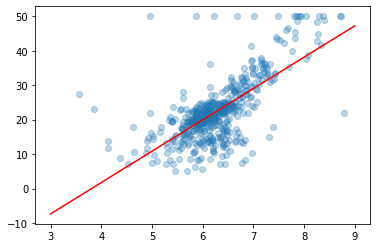

In [11]:
# traer todas las filas de la columna de numero de habitaciones por hogar
x = np.array(boston.data[:, 5])
y = np.array(boston.target)

# esta función devuelve la matriz de correlación (matriz muy parecidad a la de covarianza)
r = np.corrcoef(x, y)

print(r[1][0])

plt.scatter(x, y, alpha=0.3)

# añadimos una columna de unos según lo necesita la función de numpy
x = np.array([x, np.ones(506)]).T

# la primera posición corresponde a los resultados de la aplicación de la función de minimos cuadrados;
# la segunda posición a la suma de los residuos al cuadrado;
# la tercera posición al rango de la matriz (identificación de las variables independientes de la función/matriz);
# La cuarta posición a la descomposición en valores singulares de la matriz (halla la pseudoinversa de la matriz para 
# cumplir con la propiedad de poca multicolinearidad de las operaciones de regresión lineal).
# en la primera posición del arreglo hay otro arreglo donde la primera posición corresponde a la pendiente 
# (relación de crecimiento) y la otra al punto de corte
b = np.linalg.lstsq(x, y, rcond=None)[0]

print(b)
# predicción:
print(b[0] * 5.5 + b[1])
plt.plot([3, 9], [b[1] + b[0] * 3, b[1] + b[0] * 9], c="red")
plt.show()

## SkLearn

Scikit-learn, una biblioteca de aprendizaje automatico, cuenta con un paquete de clases que nos puede ayudar a resolver problemas de regresión lineal. Para este caso la clase que se va a utilizar es `LinearRegression()`, la cual resuelve, de manera muy simple e intuituva, la regresión lineal con el metodo $OLS$, además de estimar la calidad del ajuste con el Coeficiente de Determinación ($R^2$), entre otras cosas.

La forma de SkLearn para calcular el Coeficiente de Determinación es:

$R^2=1-$<font size="4">$\frac{SS_{res}}{SS_{tot}},$</font>

&nbsp;&nbsp;&nbsp;&nbsp; donde $SS_{res}$ es la suma residual de cuadrados y se representa de la forma:

$SS_{res} = \sum_{i=1}^{n} (y_{i}-\hat{y})^2$

&nbsp;&nbsp;&nbsp;&nbsp; mientras que $SS_{tot}$ es la suma de cuadrados total y se representa de la forma:

$SS_{tot} = \sum_{i=1}^{n} (y_{i}-\overline{y})^2$

## Coeficiente de determinación en las regresiones lineales simples

El coeficiente de determinación descrito de manera general, es la proporción de la variación en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s).

Cuando se tiene solo un coeficiente/pendiente en la ecuación (regresión lineal simple), $r^2$ es simplemente el cuadrado del Coeficiente de Correlación ($r$) entre los resultados observados y los valores predictores observados. Si hay más de un regresor (regresión lineal multiple), $R^2$ es el cuadrado del Coeficiente de Correlación Multiple. En ambos casos, el coeficiente de determinación normalmente oscila entre 0 y 1, donde 1 es el mejor ajuste y 0 el peor. Este coeficiente se puede obtener para las regresiones lineales simples de la siguiente forma:

$R^2=$<font size="4">$\frac{SS_{reg}}{SS_{tot}},$</font> 

&nbsp;&nbsp;&nbsp;&nbsp; donde $SS_{reg}$ es la suma de cuadrados explicada o suma de cuadrados debido a la regresión y se representa de la forma:

$SS_{reg} = \sum_{i=1}^{n} (\hat{y}-\overline{y})^2$

coeficiente: [-0.64849005] | termino independiente: 29.754896511928493
[14.83962528]
0.2339900304444752


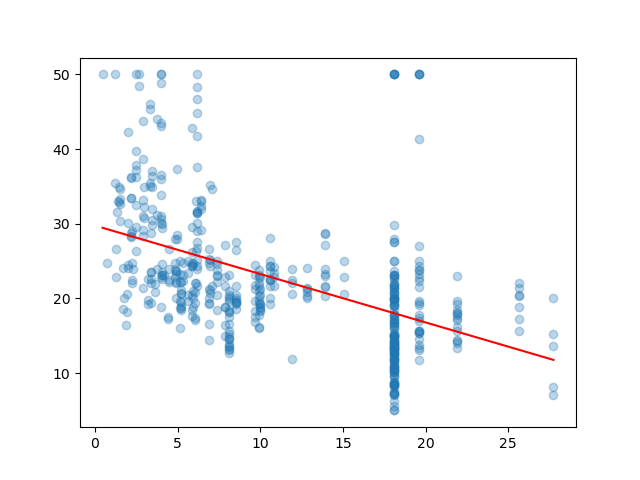

In [3]:
%matplotlib widget
# traer todas las filas de la columna de zonas comerciales no minoristas por localidad
x = np.array(boston.data[:, 2])
y = np.array(boston.target)

plt.scatter(x, y, alpha=0.3)

regr = LinearRegression()

# se remodela para que pase de ser un vector simple a una matriz donde cada columna sea una caracteristica a estimar 
# y cada fila una muestra, pues la función solo acepta ese tipo de matrices
x = x.reshape(-1, 1)

# aplica el ajuste. Halla las 'b' del modelo lineal
regr.fit(x, y)

min_x = np.amin(x)
max_x = np.amax(x)

# trae los coeficientes de regresión (regresores/pendientes)
print('coeficiente:', regr.coef_, '| termino independiente:', regr.intercept_)
print(regr.predict(np.array([[23]])))
# tiene un puntaje cercano a 0, por lo tanto no se tiene un buen ajuste a los datos
print(regr.score(x, y))
plt.plot([min_x, max_x], [regr.predict(np.array([[min_x]])), regr.predict(np.array([[max_x]]))], c="red")
plt.show()

# Regresión lineal múltiple

Modelo (las variables ahora son matrices): $Y=X\beta+\varepsilon$

Función de coste: $\hat{\beta}=(X^{T}X)^{-1}X^{T}Y$ o $MMSE$

## Calidad del ajuste

Hay varias formas de calcular la calidad del ajuste en una regresión multiple (cada una pudiendo dar diferentes medidas/perspectivas de la calidad); sin embargo, hay tres principales formas que son aplicables a este caso: el coeficiente de correlación multiple, el coeficiente de correlación parcial y el coeficiente de determinación.

### Coeficiente de correlación multiple

Para el próximo ejemplo se va a utilizar el coeficiente de correlación multiple, el cual esta basado en el coeficiente de correlación de Pearson y se define como.

$R_{z,xx}=c^{T}R^{-1}_{xx}c,$

&nbsp;&nbsp;&nbsp;&nbsp; donde $c$ es el vector de las correlaciones <font size="4">$r_{x_{n}y}$</font> entre las variables predictoras $x_n$ (variables independientes) y la variable objetivo $y$ (variable dependiente), es decir, $c=(r_{x_{1}y}, r_{x_{2}y}, ..., r_{x_{n}y})^T$; y $R_{xx}$ es la matriz de correlación entre las variables predictoras.

El valor va a variar entre 0 y 1; entre más cerca este al 1 mejor va a ser el ajuste. Hay que tener en cuenta que el orden del calculo de las correlaciones importa, por lo que en este ejemplo la correlación se calculara con el óxido nítrico como primer regresor (x) y la proporción de zonas comerciales como segundo (y).

[ 34.28833676  -0.50622841 -11.02908086]
27.122996783689157
0.2428396732764912


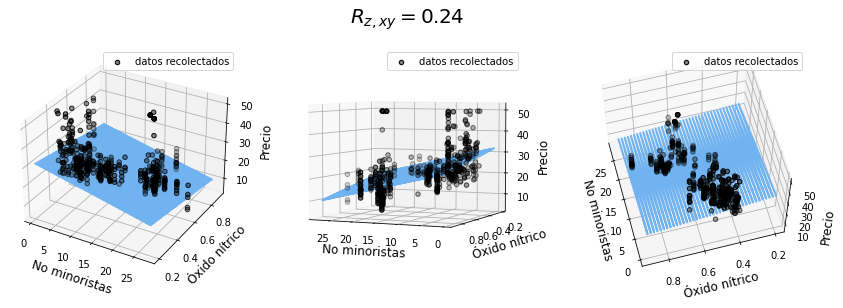

In [5]:
# traer todas las filas de la columna de zonas comerciales no minoristas por localidad y concentración de óxido nítrico
init_X = np.array([boston.data[:, 2], boston.data[:, 4]])
Y = np.array(boston.target)

x = init_X[0]
y = init_X[1]
z = Y

### Preparando los datos del modelo para su visualización ###

# rango de valores de las zonas comerciales no minoristas (se escoge 40 para ver una grafica mas densa de lineas)
x_range = np.linspace(np.amin(x), np.amax(x), 40)
# rango de valores del óxido nítrico
y_range = np.linspace(0.2, 0.9, 40)
# area de puntos donde se harán las predicciones
x_pred, y_pred = np.meshgrid(x_range, y_range)
model_vizu = np.array([np.ones(x_pred.flatten().size), x_pred.flatten(), y_pred.flatten()]).T

X = np.insert(init_X, 0, np.ones(init_X[0].size), axis=0).T

B = np.linalg.inv(X.T @ X) @ X.T @ Y

# la primera posición corresponde al termino independiente (b) y el resto de posición a las pendientes de las variables 
# independientes (m)
print(B)

predicted = model_vizu @ B

# predicción: para 5.2 de proporción de zonas comerciales y 0.411 de acumulación de óxido nítrico
print([1, 5.2, 0.411] @ B)

### hallando la correlación ###

c = np.empty(len(init_X))
for i, ind_variable in enumerate(init_X):
    c[i] = (np.cov(ind_variable, Y) / (np.std(ind_variable) * np.std(Y)))[0][1]
    
r_xx = np.zeros([len(init_X), len(init_X)])
for i, column_value in enumerate(init_X):
    for j, row_value in enumerate(init_X):
        if r_xx[i][j] == 0:
            result = (np.cov(column_value, row_value) / (np.std(column_value) * np.std(row_value)))[0][1]
            r_xx[i][j] = result
            r_xx[j][i] = result

for i, ele in enumerate(init_X):
    r_xx[i][i] = 1
r_zxy = c @ np.linalg.inv(r_xx) @ c.T

print(r_zxy)

### graficando ###

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x, y, z, facecolor=(0, 0, 0, 0.5), s=20, edgecolor='k', label = 'datos recolectados')
    ax.plot(x_pred.flatten(), y_pred.flatten(), predicted, color='#70b3f0', linewidth=2)
    ax.set_xlabel('No minoristas', fontsize=12)
    ax.set_ylabel('Óxido nítrico', fontsize=12)
    ax.set_zlabel('Precio', fontsize=12)
    ax.legend()

ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R_{z,xy} = %.2f$' % r_zxy, fontsize=20)

fig.tight_layout()

Se hace el mismo proceso utilizando las funciones de la biblioteca Numpy. En esta ocasión se haran calculos en 4 dimensiones.

In [14]:
# traer todas las filas de la columna de zonas comerciales no minoristas por localidad, cercania con el rio Charles y 
# concentración de óxido nítrico
X = np.array([boston.data[:, 2], boston.data[:, 3], boston.data[:, 4]])
Y = np.array(boston.target)

r = np.corrcoef(X, Y)
c = r[-1, :-1]
R = c @ np.linalg.inv(r[:len(X), :len(X)]) @ c.T

print(R)

X = np.append(X, [np.ones(X[0].size)], axis=0).T

# la ultima posición de este arreglo corresponde al punto de corte (termino independiente), el resto de posiciones 
# a las pendientes de las variables independientes
B = np.linalg.lstsq(X, Y, rcond=None)[0]

print(B)
# predicción: para 5.2 de proporción de zonas comerciales, una casa lejana al rio Charles (0) y 0.411 de acumulación 
# de óxido nítrico
print([5.2, 0, 0.411, 1] @ B)

0.28723658140330444
[ -0.50162161   7.73076491 -12.78280617  34.67507785]
26.81291215720719


### Coeficiente de determinación

Además de lo explicado en secciones anteriores acerca de este coeficiente, en la regresión lineal multipe, el valor del coeficiente no es directamente una medida de qué tan buenos son los valores modelados, sino una medida de qué tan bien podría construirse un predictor a partir de los valores modelados. Por ejemplo, un valor como $R^2 = 0,7$ puede interpretarse de la siguiente manera: "El setenta por ciento de la varianza en la variable de respuesta puede explicarse por las variables explicativas. El treinta por ciento restante puede atribuirse a variables ocultas desconocidas o a la variabilidad inherente".

$R^2$, como a otras descripciones estadísticas de correlación y asociación, aplica la afirmación "la correlación no implica causalidad".

### Coeficiente de correlación parcial

Mide el grado de asociación entre dos variables aleatorias, eliminando el efecto de un conjunto de variables aleatorias de control. Al igual que el coeficiente de correlación, el coeficiente de correlación parcial toma un valor en el rango de -1 a 1. Donde -1 y 1 son valores que describen una buena correlación y el 0 describe una mala o nula correlación.

A continuación se  va a encontrar la correlación parcial entre la cercania al rio Charles $x$ ("variable independiente") y el valor de la casa $z$ ("variable dependiente"), controlando la concentración del óxido nítrico $y$ ("variable de control"). Al igual que en el coeficiente de correlación multiple, el orden en que se evaluen las variables afectara el resultado y su interpretación.

Para encontrar el valor del coeficiente se pueden utilizar varias operaciones. Una de ellas es hallando el coeficiente de correlación de Pearson de los residuos de las regresiones lineales de las variables implicadas y otra es hallando los coeficientes de correlación de Pearson de las distintas variables implicadas. Este ultimo es el que se va a utilizar y se define como:

$\rho_{xz·y}=$<font size="4">$\frac{\rho_{xz}-\rho_{xy}\rho_{yz}}{\sqrt{1-\rho^{2}_{xy}}\sqrt{1-\rho^{2}_{yz}}}$</font>

&nbsp;&nbsp;&nbsp;&nbsp; donde $\rho_{xz·y}$ es la correlación parcial para las variables y $\rho_{xz}$ la correlación de Pearson de las variables.

coeficientes: [  7.82242764 -35.47982729] | termino independiente: 41.672214217360874
[22.15830921]
Coeficiente de correlación parcial: 0.23861562039182665


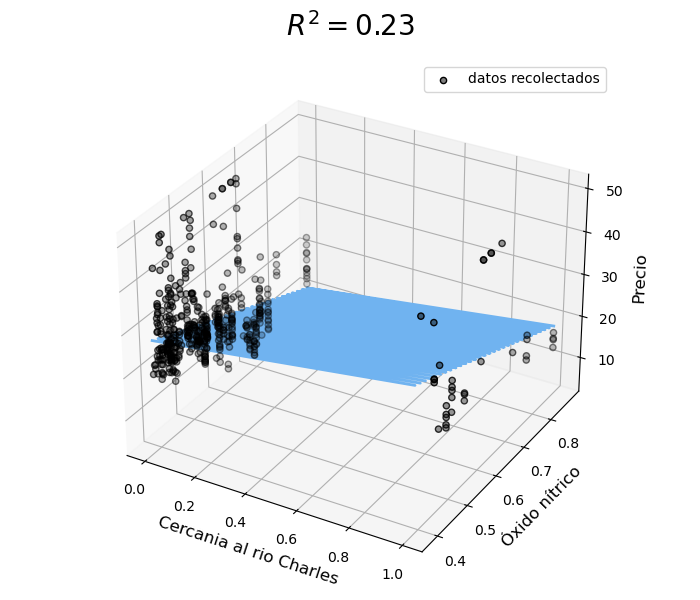

In [4]:
%matplotlib widget

def animate(i):
    ax.view_init(elev=32, azim=i)
    
def partial_corr(indepent, dependent, control):
    p_xy = np.cov(indepent, dependent) / (np.std(indepent) * np.std(dependent))
    p_xz = np.cov(indepent, control) / (np.std(indepent) * np.std(control))
    p_zy = np.cov(control, dependent) / (np.std(control) * np.std(dependent))
    p_xyz = (p_xy[0][1] - p_xz[0][1] * p_zy[0][1]) / (np.sqrt(1 - p_xz[0][1] ** 2) * np.sqrt(1 - p_zy[0][1] ** 2))
    
    return p_xyz

# traer todas las filas de la columna cercania con el rio Charles y concentración de óxido nítrico
X = np.array([boston.data[:, 3], boston.data[:, 4]])
Y = np.array(boston.target)

x = X[0]
y = X[1]
z = Y

x_range = np.linspace(np.amin(x), np.amax(x), 30)
y_range = np.linspace(np.amin(y), np.amax(y), 30)
x_pred, y_pred = np.meshgrid(x_range, y_range)
model_vizu = np.array([x_pred.flatten(), y_pred.flatten()]).T

regr = LinearRegression()
regr.fit(X.T, Y)
predicted = regr.predict(model_vizu)

print('coeficientes:', regr.coef_, '| termino independiente:', regr.intercept_)
print(regr.predict(np.array([[0, 0.55]])))

R2 = regr.score(X.T, Y)

p_xyz = partial_corr(x, z, y)

fig = plt.figure(figsize=(7, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, facecolor=(0, 0, 0, 0.5), s=20, edgecolor='k', label = 'datos recolectados')
ax.plot(x_pred.flatten(), y_pred.flatten(), predicted, color='#70b3f0', linewidth=2)
ax.set_xlabel('Cercania al rio Charles', fontsize=12)
ax.set_ylabel('Óxido nítrico', fontsize=12)
ax.set_zlabel('Precio', fontsize=12)
ax.legend()

#ani = animation.FuncAnimation(
#    fig, animate, interval=20, blit=True, save_count=50)
ani = animation.FuncAnimation(fig, animate, frames=360,
                    interval=100, repeat=False)

# al parecer el coeficiente de correlación parcial muestra que la inclusión de x (cercania al rio Charles) es la
# que mayor representa valor en la correlación en general, entre las variables independientes y la dependiente.
# mostrando que la correlación entre x y z (valor de las viviendas) es muy parecido al valor del coeficiente de
# determinación entre todas las variables implicadas. Quiza si se calcula el coeficiente parcial entre z y
# y (concentración de óxido nítrico) el valor del coeficiente parcial sería diferente
print('Coeficiente de correlación parcial:', p_xyz)

fig.suptitle('$R^2 = %.2f$' % R2, fontsize=20)

fig.tight_layout()